In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/demo-knes381/subject_1321.xlsx
/kaggle/input/demo-knes381/subject_1432.xlsx
/kaggle/input/demo-knes381/subject_1321.csv
/kaggle/input/demo-knes381/subject_1232.csv
/kaggle/input/demo-knes381/VO2_CSV.csv
/kaggle/input/demo-knes381/subject_1232.xlsx
/kaggle/input/demo-knes381/subject_1432.csv
/kaggle/input/demo-knes381/subject_1523.csv
/kaggle/input/demo-knes381/VO2_excel.xlsx
/kaggle/input/demo-knes381/subject_1523.xlsx
/kaggle/input/knes381-demo2/__results__.html
/kaggle/input/knes381-demo2/__notebook__.ipynb
/kaggle/input/knes381-demo2/__output__.json
/kaggle/input/knes381-demo2/custom.css
/kaggle/input/knes381-demo2/__results___files/__results___33_1.png
/kaggle/input/knes381-demo2/__results___files/__results___33_0.png


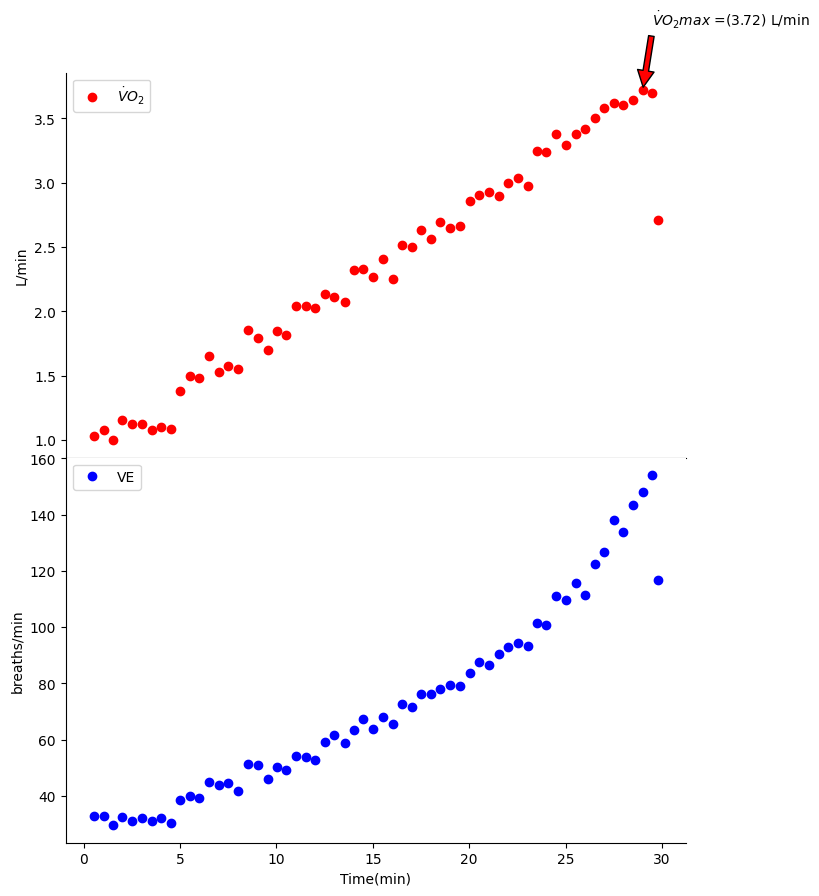

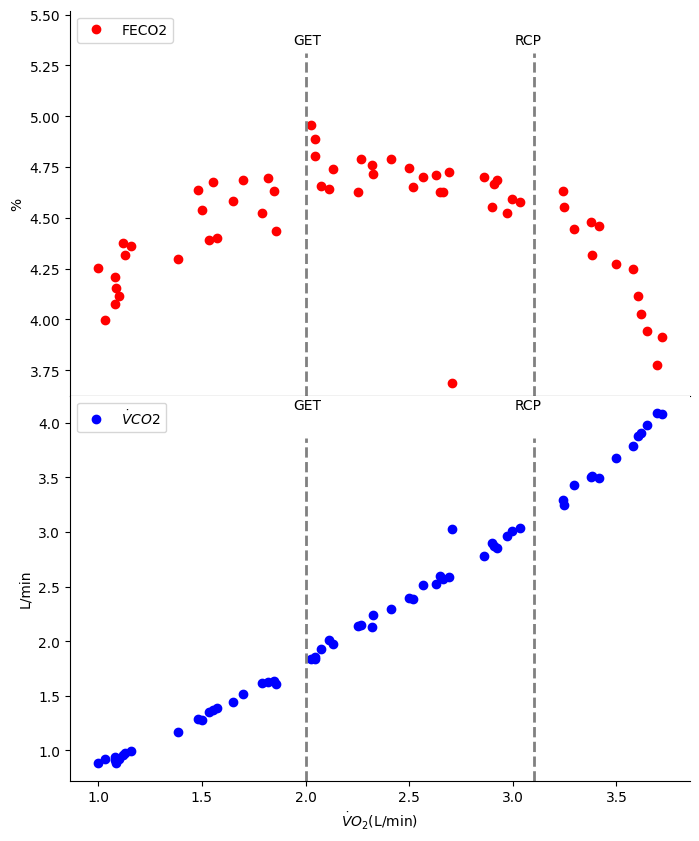

In [2]:
# Lets read in our file now
df = pd.read_csv('../input/demo-knes381/subject_1432.csv', header=[0], skiprows=[1,2,3])

# rename our column headers
df = df.rename(columns={'VE/': 'VE/VO2','VE/.1': 'VE/VCO2'})

# labelling our relavant values to be easier to type
x = df['TIME']
y = df['VO2']
y1 = df['VE']

#Find VO2 max value 
ymax = max(y)

# find the x position of the ymax value or where ymax occurs on the x axis
xmax = x[y.argmax()]

fig, ax = plt.subplots(2, 1, sharex=True, figsize=(8, 10)) # Two figures

# this line seperates the two plots
fig.subplots_adjust(hspace=0)

# annotate the position of V02 max before plotting the value, we could do this later but why.

ax[0].annotate('$\dot VO_2max$ =({}) L/min'.format(round(ymax, 2)), 
               xy=(xmax, ymax), xytext=(xmax+.5, ymax+ .5),
               arrowprops=dict(facecolor='red', shrink= 0.05),
                )
# plotting VO2 on top
ax[0].plot(x, y, 'o', label=('$\dot VO_2$'), c='r' )
# in the line of code below I hide the top and right black bars serrounding the plot for APA format.
ax[0].spines[['right', 'top']].set_visible(False)
ax[0].set(ylabel=('L/min'))
ax[0].legend()

# Second plot of values down from the top
ax[1].plot(x, y1, 'o', label=('VE'), c='b')
ax[1].spines[['top', 'right']].set_visible(False)
ax[1].set(ylabel=('breaths/min'))
ax[1].set(xlabel=('Time(min)'))
ax[1].legend()

# save the figure before we show it... or it will be blank
fig.savefig("VO2-VE-5.png", dpi=300, bbox_inches = "tight")
fig.show()

# read
df = pd.read_csv('../input/demo-knes381/subject_1432.csv', header=[0], skiprows=[1,2,3])

# rename column headers
df = df.rename(columns={'VE/': 'VE/VO2','VE/.1': 'VE/VCO2'})

# labelling our relavant values to be easier to type
x = df['VO2']
y = df['FECO2']
y1 = df['VCO2']


fig, ax = plt.subplots(2, 1, sharex=True, figsize=(8, 10)) # Two figures

# this line seperates the two plots
fig.subplots_adjust(hspace=0)


# plotting FECO2 on top
ax[0].plot(x, y, 'o', label=('FECO2'), c='r' )

# in the line of code below I hide the top and right black bars serrounding the plot for APA format.
ax[0].spines[['right', 'top']].set_visible(False)
ax[0].set(ylabel=('%'))
ax[0].legend()
ax[0].legend(loc="upper left")

# change height of figure
ymin, ymax = ax[0].get_ylim()
ax[0].set_ylim(ymin,ymax *1.1)

# metabolic lines

GET = 2.0
RCP = 3.1
y_limits = ax[0].get_ylim()
GETln = y_limits[1]
RCPln = y_limits[1]
ax[0].axvline( x=GET,color='gray', linestyle = '--', linewidth=2, ymin=0.0, ymax=0.89,)
ax[0].axvline( x=RCP,color='gray', linestyle = '--', linewidth=2, ymin=0.0, ymax=0.89)
ax[0].text(2.0*.97, GETln*.97, 'GET', color = 'black')
ax[0].text(3.1*.97, RCPln*.97, 'RCP', color = 'black')



# Second plot of values down from the top
ax[1].plot(x, y1, 'o', label=('$\dot VCO2$'), c='b')
ax[1].spines[['top', 'right']].set_visible(False)
ax[1].set(ylabel=('L/min'))
ax[1].set(xlabel=('$\dot VO_2$(L/min)'))
ax[1].legend()
ax[1].legend(loc="upper left")

y_limits = ax[1].get_ylim()
GETln1 = y_limits[1]
RCPln1 = y_limits[1]
ax[1].axvline( x=GET,color='gray', linestyle = '--', linewidth=2, ymin=0.0, ymax=0.89,)
ax[1].axvline( x=RCP,color='gray', linestyle = '--', linewidth=2, ymin=0.0, ymax=0.89)
ax[1].text(2.0*.97, GETln1*.97, 'GET', color = 'black')
ax[1].text(3.1*.97, RCPln1*.97, 'RCP', color = 'black')

# save the figure before we show it... or it will be blank
fig.savefig("feco2-vco2-5.png", dpi=300, bbox_inches = "tight")
fig.show()